# Norfolk, VA Case Study
## System set up

- Reproducing this script requires a Hydroshare username and password
- The data will be saved to a path like `...Local\TRITON_SWMM_toolkit\...\contents`. 
- Data source: https://www.hydroshare.org/resource/a4aace329b8c401a93e94ce2a761fe1b/

In [1]:
from TRITON_SWMM_toolkit.examples import retrieve_norfolk_irene_example
norfolk_irene = retrieve_norfolk_irene_example(download_if_exists=False)
norfolk_irene.system.experiment.print_all_yaml_defined_input_files()

/home/dcl3nd/
├── .local/
│   └── share/
│       └── TRITON_SWMM_toolkit/
│           └── examples/
│               └── norfolk_coastal_flooding/
│                   └── data/
│                       └── contents/
│                           ├── system/
│                           ├── shp_watershed/
│                           │   └── norfolk_wshed_epsg32147_state_plane_m.shp
│                           ├── fullres_dem_m.tif
│                           ├── landuse_lookup_tables.csv
│                           ├── swmm/
│                           │   ├── hague_hydraulics_model_template.inp
│                           │   ├── hague_hydrology_model_template.inp
│                           │   └── hague_full_model_template.inp
│                           ├── landuse_clipped_to_triton_extent.tif
│                           ├── software/
│                           ├── b_sub_ids_and_mrms_rain_col.csv
│                           ├── TRITON_SWMM_definition_template.cfg
│                      

## Preparing TRITON-SWMM inputs (system set up)
### Generating TRITON-ready manning's and DEM files

Not that the DEM that is input to this process already has elevations of 9999 $m$ assigned outside of the watershed aside from a corridor connecting the watershed to the variable water level boundary condition. Also, elevations of 80 $m$ were assigned to grid cells overlapping with buildings.

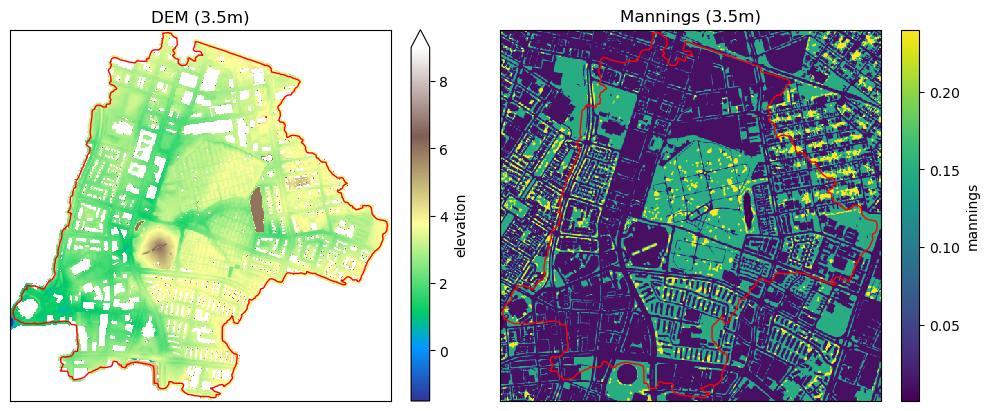

In [2]:
# create system level inputs (DEM and mannings)
norfolk_irene.system.process_system_level_inputs(overwrite_if_exists=False, verbose = False)
norfolk_irene.system.plot_dem_and_mannings()

#  set up simulations

In [3]:
# comile 
norfolk_irene.system.experiment.compile_TRITON_SWMM(recompile_if_already_done_successfully=False)
# set up simulations
norfolk_irene.system.experiment.prepare_all_scenarios(overwrite_sims=False,
                                            rerun_swmm_hydro_if_outputs_exist=False,
                                            verbose=False)
# inspect simulation log
norfolk_irene.system.experiment.print_logfile_for_scenario(sim_iloc=0)

{
    "sim_iloc": 0,
    "event_idx": {
        "year": 9,
        "event_type": "compound",
        "event_id": 1
    },
    "logfile": "/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/single_sim/sims/0-year.9_event_type.compound_event_id.1/log.json",
    "simulation_folder": "/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/single_sim/sims/0-year.9_event_type.compound_event_id.1",
    "swmm_rainfall_dat_files": {
        "156": "/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/single_sim/sims/0-year.9_event_type.compound_event_id.1/dats/grid-ind156.dat",
        "171": "/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/single_sim/sims/0-year.9_event_type.compound_event_id.1/dats/grid-ind171.dat",
        "170": "/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coast

In [4]:
# view all files and folders created for the system, experiment, and simulation
norfolk_irene.system.experiment.print_all_sim_files(sim_iloc=0)

/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/
├── elevation.dem
├── mannings.dem
└── single_sim/
    ├── compiled_software/
    │   ├── build/
    │   ├── compile.sh
    │   └── compilation.log
    └── sims/
        └── 0-year.9_event_type.compound_event_id.1/
            ├── log.json
            ├── dats/
            ├── swmm/
            │   ├── hydro.inp
            │   ├── hydraulics.inp
            │   └── full.inp
            ├── extbc/
            │   ├── tseries.txt
            │   └── loc.extbc
            ├── strmflow/
            │   ├── tseries.hyg
            │   └── loc.txt
            ├── TRITONSWMM.cfg
            ├── build/
            │   └── triton
            └── tritonswmm_sim_logfiles/


# Running a simulation

In [ ]:
norfolk_irene.system.experiment.run_all_sims_in_series(mode="single_core", pickup_where_leftoff=True, verbose = False) # only runs 1 sim since there is only 1 event specified in this experiment

In [6]:
norfolk_irene.system.experiment.scenarios[0].retrieve_latest_simlog()

{'sim_datetime': '2026-01-07T16:55:41-05:00',
 'sim_start_reporting_tstep': 0,
 'tritonswmm_logfile': PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/single_sim/sims/0-year.9_event_type.compound_event_id.1/tritonswmm_sim_logfiles/2026-01-07T165541-0500.log'),
 'time_elapsed_s': 9696.491301317,
 'status': 'simulation completed'}